<a href="https://colab.research.google.com/github/dribnet/clipit/blob/future/demos/PixelDrawer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLIPIT PixelDraw demo

This version of the notebook is setup to easily change from VQGAN to PixelDraw or ClipDraw to render the image.

In [1]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. Unfortunately *you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again*. It should remind you to
#@markdown do this after the first run.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

# https://stackoverflow.com/a/56727659/1010653

from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone -b future https://github.com/dribnet/clipit
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run the cell again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [2]:
#@title Main Settings

#@markdown When using PixelDraw, I add #pixelart to the prompt
#@markdown If PixelDraw is not used, it will use VQGAN instead

prompts = "Seattle Skyline. #pixelart" #@param {type:"string"}

aspect = "widescreen" #@param ["widescreen", "square"]

use_pixeldraw = True #@param {type:"boolean"}

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and we can then run it below.

# Simple setup
import clipit
from IPython import display

# these are good settings for pixeldraw
clipit.reset_settings()
clipit.add_settings(prompts=prompts, aspect=aspect)
clipit.add_settings(quality="better", scale=2.5)
clipit.add_settings(use_pixeldraw=use_pixeldraw)


/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


## Optional custom settings

The code block below is a chance to sneak in some last settings before we start the code. For example, you can set the quality to "draft" or the scale to 4. In the other notebooks if you want to sneak in a different vqgan model before drawing, you can do it here by requesting a different vqgan_model settings. This allows us to mix and match the best settings discussed in different notebooks.

Make sure you click the play button below *after* running the easy settings above if you want to make any of these modifications before running.

In [3]:
# lines like this one starting with '#" are comments and do not get run

# here's an example setting: setting the quality to draft (faster)
# clipit.add_settings(quality="draft")

# this is the example of how to run longer with less frequent display
# clipit.add_settings(iterations=500, display_every=50, save_every=10)

100%|████████████████████████████████████████| 244M/244M [00:01<00:00, 189MiB/s]
100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 62.5MiB/s]
100%|███████████████████████████████████████| 335M/335M [00:05<00:00, 61.0MiB/s]


Using device: cuda:0
Optimising using: AdamP
Using text prompts: ['Seattle Skyline. #pixelart']
Using seed: 394019628064958304


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/kornia/utils/helpers.py:96: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  out1, out2 = torch.solve(input.to(dtype), A.to(dtype))


iter: 0, loss: 2.76659, losses: 0.963184, 0.90241, 0.901


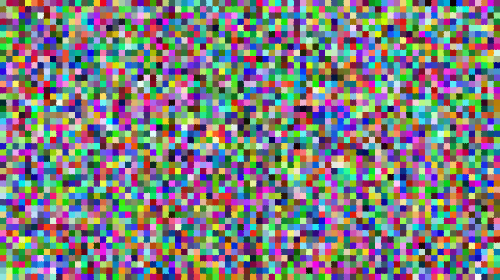

iter: 10, loss: 2.61661, losses: 0.947218, 0.828234, 0.841161
iter: 20, loss: 2.47646, losses: 0.914843, 0.769503, 0.792119


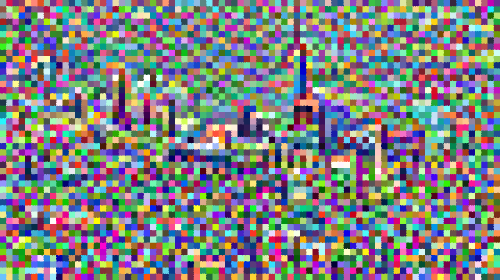

iter: 30, loss: 2.3134, losses: 0.85777, 0.722873, 0.732758
iter: 40, loss: 2.16399, losses: 0.796016, 0.690723, 0.677255


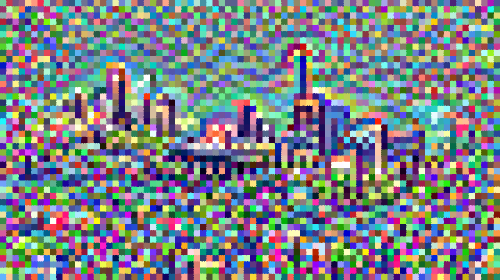

iter: 50, loss: 2.21891, losses: 0.827731, 0.692789, 0.698394
iter: 60, loss: 2.1945, losses: 0.826429, 0.684488, 0.683584


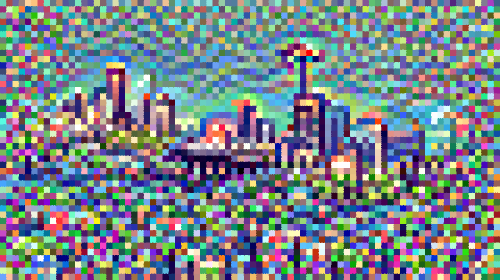

iter: 70, loss: 2.11348, losses: 0.791579, 0.666222, 0.655682
iter: 80, loss: 2.00151, losses: 0.734318, 0.641815, 0.62538


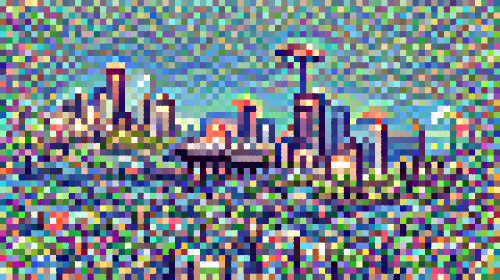

iter: 90, loss: 1.98759, losses: 0.730751, 0.637702, 0.619134
iter: 100, loss: 2.09917, losses: 0.792701, 0.658537, 0.647929


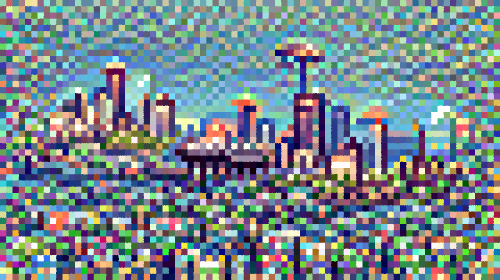

iter: 110, loss: 2.06425, losses: 0.768353, 0.652099, 0.643801
iter: 120, loss: 2.06532, losses: 0.774483, 0.651616, 0.639218


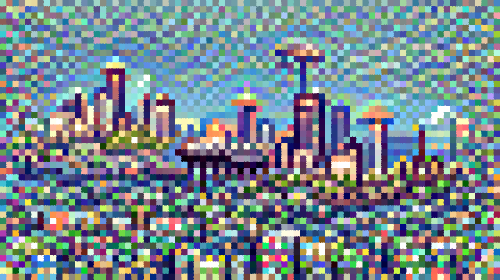

iter: 130, loss: 2.06004, losses: 0.764018, 0.652696, 0.643326
iter: 140, loss: 1.92212, losses: 0.700699, 0.620407, 0.601017


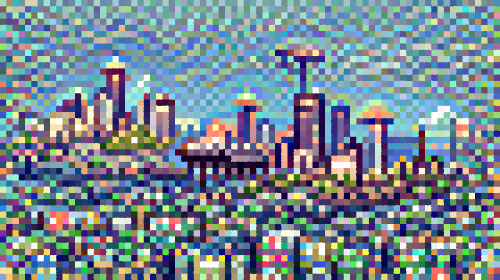

iter: 150, loss: 2.07451, losses: 0.767066, 0.659129, 0.648314
iter: 160, loss: 2.04369, losses: 0.758217, 0.651439, 0.634038


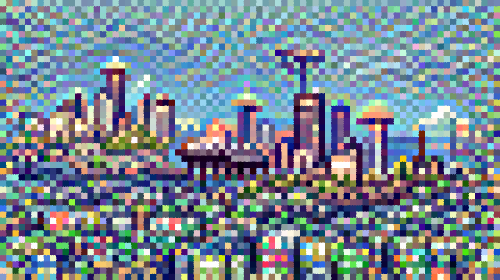

iter: 170, loss: 1.90489, losses: 0.690931, 0.615977, 0.597984
iter: 180, loss: 2.00797, losses: 0.742641, 0.644117, 0.621211


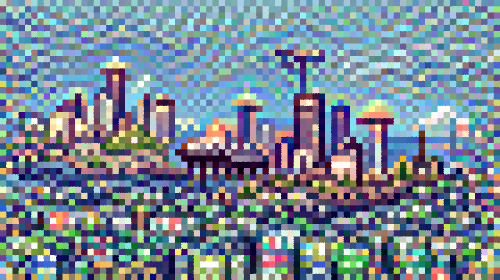

iter: 190, loss: 2.03703, losses: 0.75827, 0.648459, 0.630299
iter: 200, loss: 1.9873, losses: 0.737287, 0.637542, 0.612466


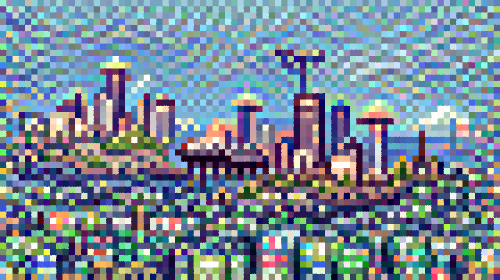

iter: 210, loss: 2.03592, losses: 0.761629, 0.64957, 0.624726
iter: 220, loss: 2.03763, losses: 0.760441, 0.646655, 0.630538


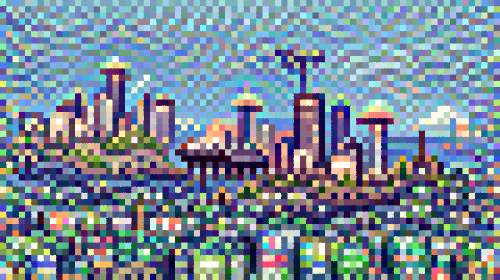

iter: 230, loss: 2.04472, losses: 0.766627, 0.645959, 0.632132
iter: 240, loss: 2.00946, losses: 0.751033, 0.638323, 0.620105


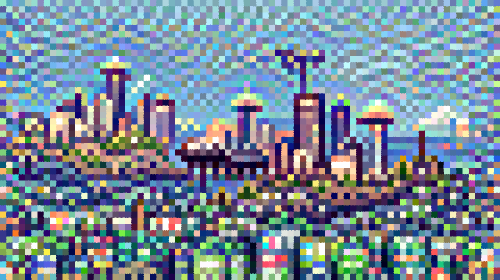

iter: 250, loss: 1.97379, losses: 0.734199, 0.634314, 0.605272
iter: 260, loss: 1.88343, losses: 0.685639, 0.611153, 0.586637


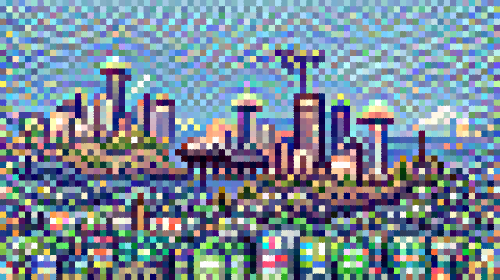

iter: 270, loss: 1.88633, losses: 0.688168, 0.611123, 0.587036
iter: 280, loss: 2.02196, losses: 0.757015, 0.642633, 0.622308


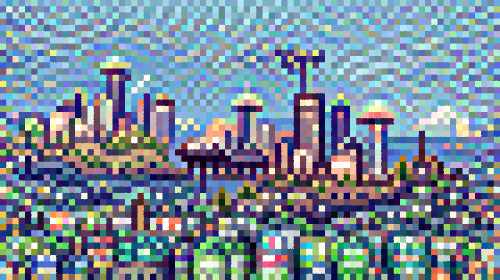

iter: 290, loss: 2.04386, losses: 0.759807, 0.651536, 0.632513
iter: 300, loss: 1.8862, losses: 0.687931, 0.610791, 0.58748


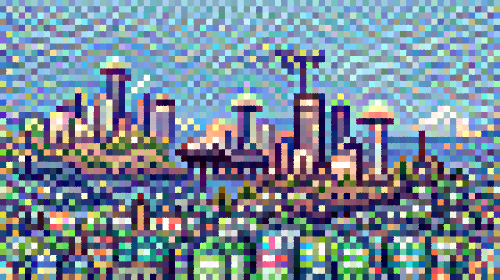

iter: 310, loss: 1.98111, losses: 0.736627, 0.63334, 0.611142
iter: 320, loss: 1.97376, losses: 0.736329, 0.630763, 0.606673


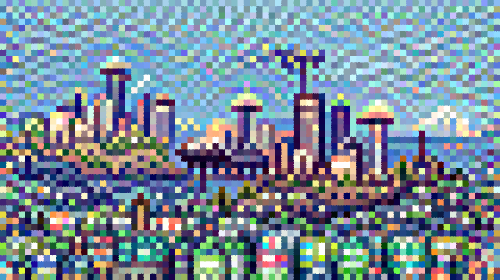

iter: 330, loss: 1.87704, losses: 0.680421, 0.608272, 0.588345
iter: 340, loss: 1.99295, losses: 0.742319, 0.634139, 0.616496


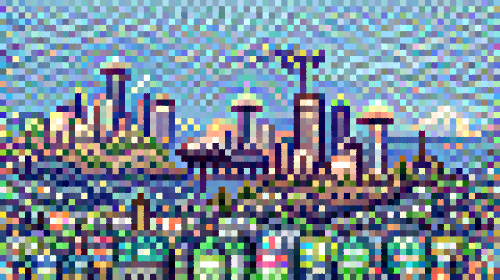

iter: 350, loss: 1.95007, losses: 0.72165, 0.625683, 0.602735
iter: 360, loss: 2.02132, losses: 0.757565, 0.643861, 0.619894


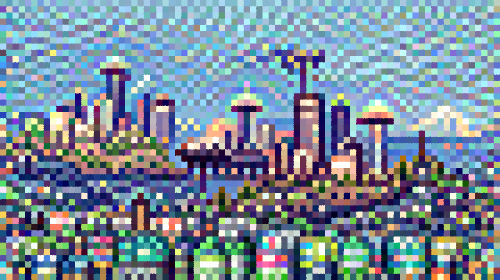

iter: 370, loss: 1.94547, losses: 0.717789, 0.624437, 0.603244
iter: 380, loss: 1.88114, losses: 0.681003, 0.608938, 0.591202


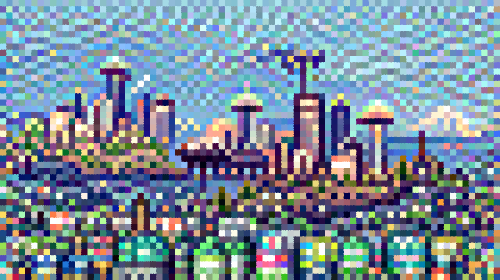

iter: 390, loss: 1.87053, losses: 0.678605, 0.606681, 0.585247
iter: 400, loss: 2.01754, losses: 0.756192, 0.640848, 0.620502


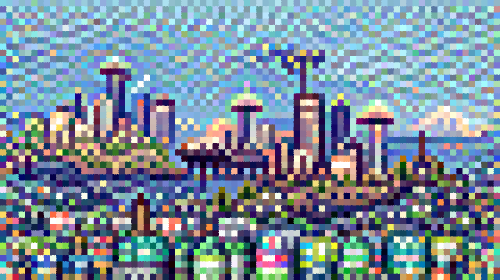

iter: 410, loss: 1.98844, losses: 0.739195, 0.635125, 0.614116
iter: 420, loss: 1.87916, losses: 0.685693, 0.60661, 0.586854


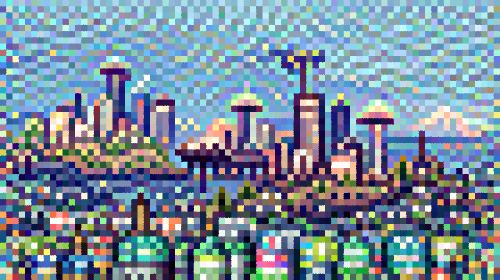

iter: 430, loss: 1.86852, losses: 0.677548, 0.606284, 0.584689
iter: 440, loss: 1.87288, losses: 0.680051, 0.607712, 0.585115


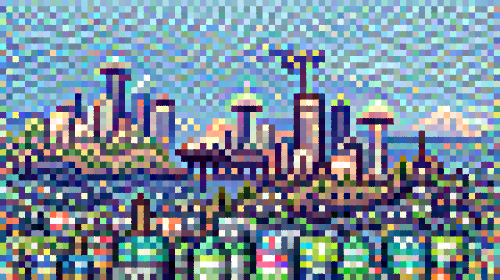

iter: 450, loss: 1.96568, losses: 0.729596, 0.628673, 0.607412
iter: 460, loss: 2.01366, losses: 0.751128, 0.642414, 0.620116


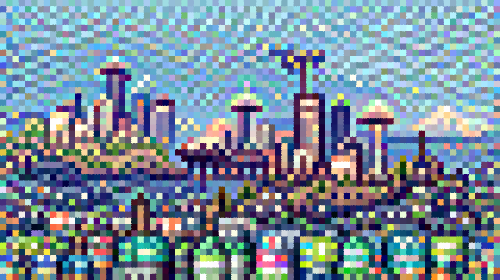

iter: 470, loss: 1.98732, losses: 0.74654, 0.63317, 0.607615
iter: 480, loss: 1.88007, losses: 0.685544, 0.607401, 0.587128


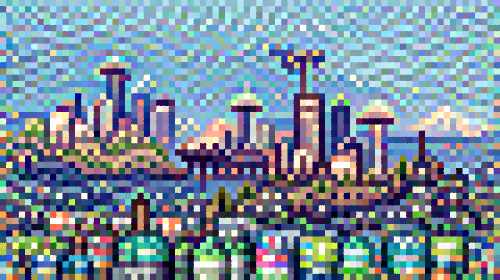

iter: 490, loss: 1.98459, losses: 0.73673, 0.632879, 0.614977
iter: 500, loss: 1.87436, losses: 0.679812, 0.605036, 0.589508


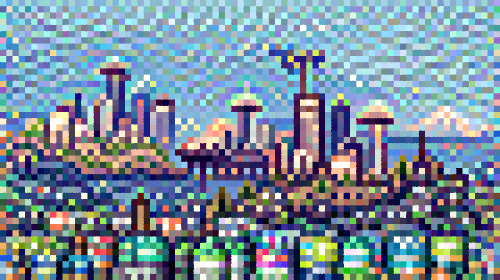

In [4]:
#@title Now Run

#@markdown Now we'll apply all settings and run.
#@markdown 
#@markdown Click the play button to the left to get this running.
#@markdown 
#@markdown When this is done, you can go above and change the
#@markdown model in the settings and see if you get different results.
#@markdown Note that the first time you run any model it takes a bit
#@markdown longer because the model has to download when needed.

settings = clipit.apply_settings()
clipit.do_init(settings)

clipit.do_run(settings)